# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

In [47]:
data = pd.read_csv("./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
data.columns = [col.lower().replace(' ', '_')  for col in data.columns]

In [48]:
categoricals = data.select_dtypes(np.object)
categoricals.head(2)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


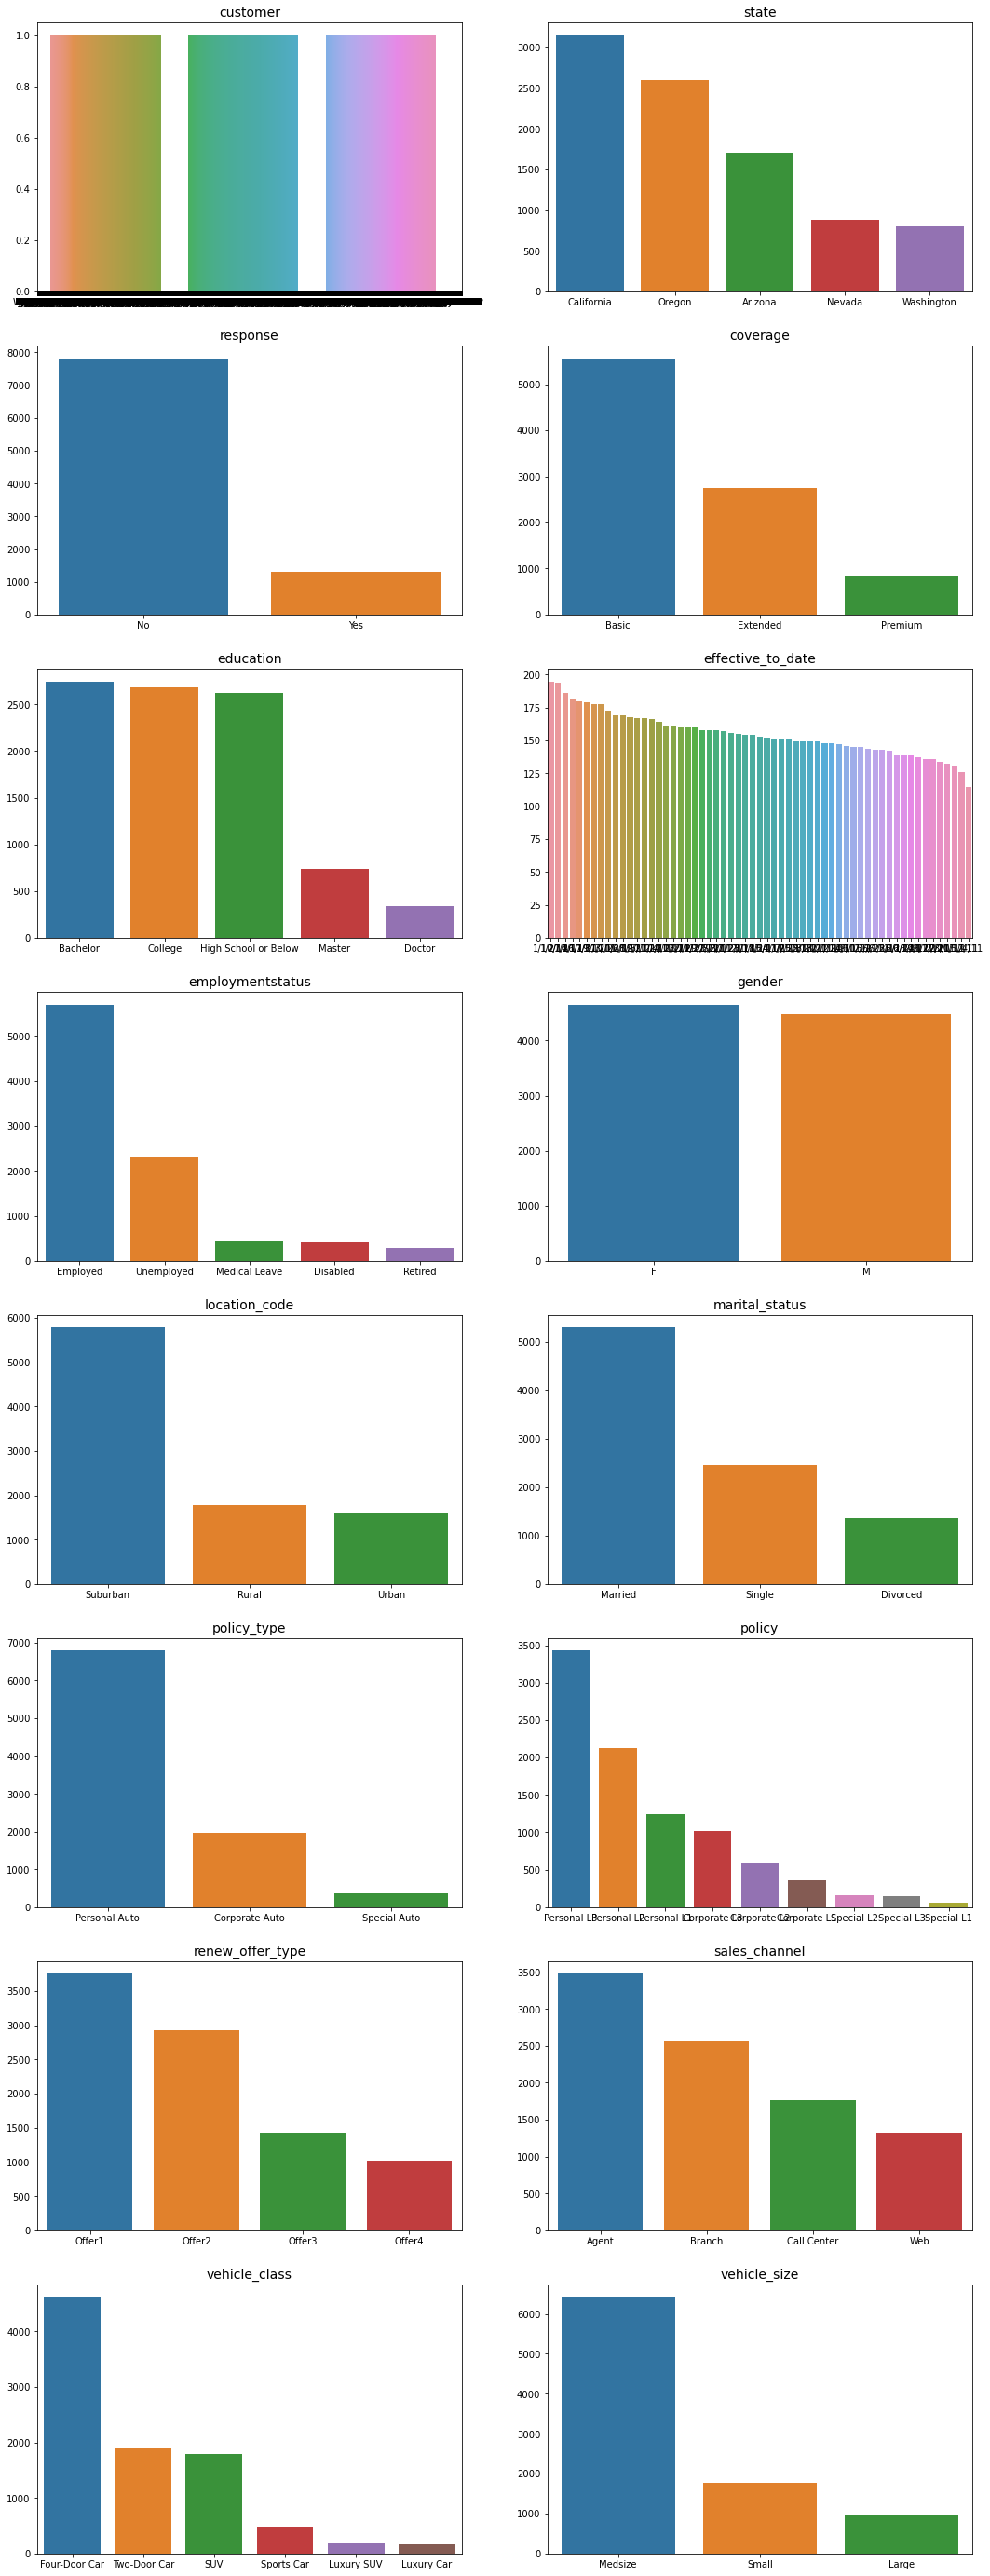

In [65]:
f, axes = plt.subplots(int(categoricals.shape[1] / 2), 2, figsize=(18, 50))

for i, col in enumerate(categoricals):

    sns.barplot(x = categoricals[col].value_counts().index,
                y = categoricals[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()

<AxesSubplot:ylabel='policy'>

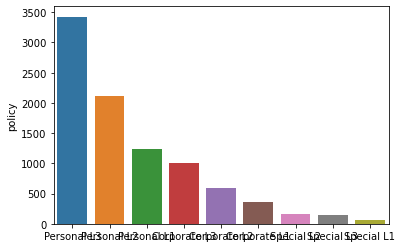

In [66]:
sns.barplot(x = categoricals["policy"].value_counts().index, y = categoricals["policy"].value_counts())

In [67]:
# Education, employment status, policy, and vehicle class are somewhat unbalanced.
# For education we could turn it into a binary variable (college +-), but I wouldn't touch it.
# Policy is redundant, maybe we can classify it in L1, L2 and L3 groups
# Id concatenate luxury SUV, sports car and luxury car into luxury or among the other classes
# For employment we could divide them among employed, unemployed and inactive
# We can see that having open complaints isn't that common
# so we can turn it into a binary variable, open not open
# For the number of policies we could join use 1, 2, 3, 4+

In [68]:
# Check policy
categoricals["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [69]:
L = categoricals["policy"].apply(lambda x: x[-2:])
policy = categoricals["policy"].apply(lambda x: x[:-2])

In [70]:
# L looks like an independent variable

L.value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

In [71]:
L = categoricals["policy"].apply(lambda x: x[-2:])
policy = categoricals["policy"].apply(lambda x: x[:-2])

In [72]:
categoricals["coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [73]:
categoricals["marital_status"].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [74]:
policy.value_counts()

Personal      6788
Corporate     1968
Special        378
Name: policy, dtype: int64

In [75]:
categoricals["policy_type"].value_counts()

# As we thought at first this was kind of
# redundant, we will have to deal with it later on

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [76]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

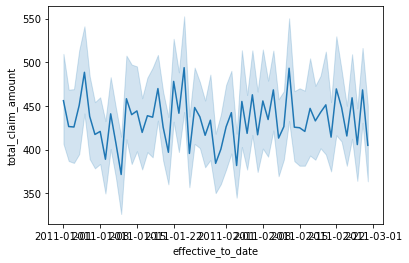

In [77]:
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = data)

In [78]:
# Cant see clear pattern, would need to divide per day week month
time_df = pd.DataFrame()
time_df["day"] = data["effective_to_date"].dt.day
time_df["week"] = data["effective_to_date"].dt.week
time_df["month"] = data["effective_to_date"].dt.month
time_df["target"] = data["total_claim_amount"]

In [79]:
time_df['month'].unique()

array([2, 1], dtype=int64)

<AxesSubplot:xlabel='month', ylabel='target'>

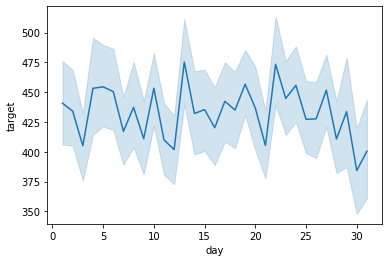

In [80]:
sns.lineplot(x="month", y="target", data = time_df)